In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:/Users/Dell/Downloads/diamonds_new.csv')

In [3]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [6]:
data[['cut', 'color', 'clarity']]

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [7]:
data.shape

(53940, 9)

In [8]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [9]:
zero_index=data[(data['x']==0)|(data['y']==0)|(data['z']==0)].index

In [10]:
zero_index

Int64Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')

In [11]:
data1=data.drop(zero_index)

In [12]:
data1.shape

(53932, 9)

# Outlier

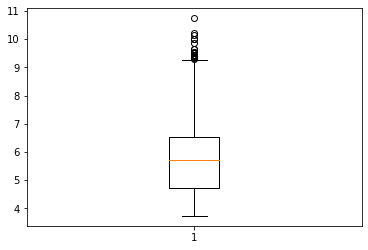

In [13]:
plt.boxplot(data1['x'])
plt.show()

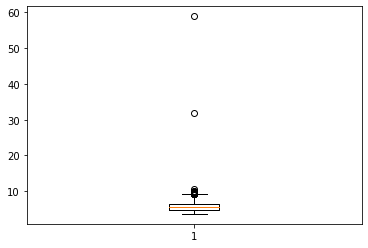

In [14]:
plt.boxplot(data1['y'])
plt.show()

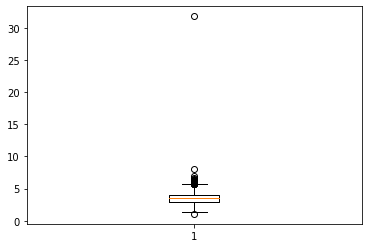

In [15]:
plt.boxplot(data1['z'])
plt.show()

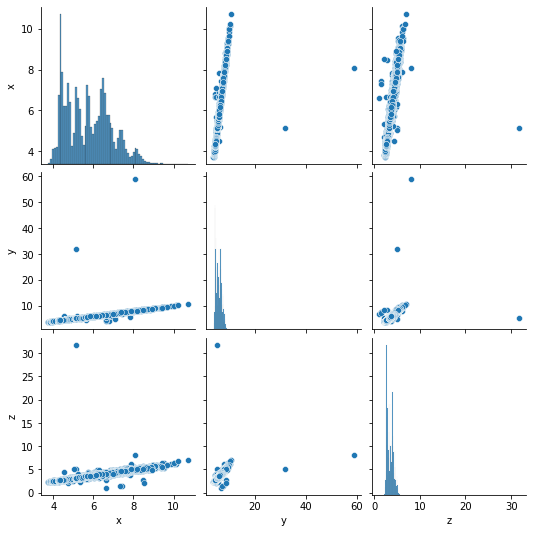

In [16]:
sns.pairplot(data1[['x','y','z']])
plt.show()

In [17]:
data1[data1['y']>30].index

Int64Index([24067, 49189], dtype='int64')

In [18]:
data1[data1['z']>30].index

Int64Index([48410], dtype='int64')

In [19]:
data2=data1.drop([24067, 49189,48410])

In [20]:
data2.describe()

,carat,table,x,y,z,price_new
count,53830.000000,53866.000000,53929.000000,53929.000000,53929.000000,53929.000000
mean,0.798048,57.457669,5.731986,5.733796,3.539523,1966.026702
std,0.474385,2.235320,1.119649,1.111501,0.691693,1994.334768
min,0.200000,43.000000,3.730000,3.680000,1.070000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,474.500000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.000000
max,5.010000,95.000000,10.740000,10.540000,6.980000,9411.500000


In [21]:
data2.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [22]:
for i in ['carat','table']:
    data2[i]=data2[i].fillna(data[i].median())

In [23]:
data2['color'] = data2['color'].fillna(data2['color'].mode()[0])


In [24]:
data2.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

In [25]:
data2['color'].nunique()

7

In [26]:
data2['cut'].nunique()

5

In [27]:
data2['clarity'].nunique()

8

# Label Encoding

In [28]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [29]:
data2['color']=label_encoder.fit_transform(data2['color'])

In [30]:
data2['cut']=label_encoder.fit_transform(data2['cut'])


In [31]:
data2['clarity']=label_encoder.fit_transform(data2['clarity'])

In [32]:
data2.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,1,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5


In [33]:
data2.shape

(53929, 9)

In [34]:
data.shape

(53940, 9)

In [35]:
data2.dtypes

carat        float64
cut            int32
color          int32
clarity        int32
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [36]:
X = data2.drop(['price_new'], axis=1)
y = data2['price_new']

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predctions=model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error,r2_score

In [40]:
print('Mean squared error is:',mean_squared_error(y_test,predctions))
print('R squared value is:',r2_score(y_test,predctions))

Mean squared error is: 448297.2911052442
R squared value is: 0.886294205516088


# Normalization

In [41]:
X=data.drop('price_new',axis=1)
y=data['price_new']

In [42]:
from sklearn import preprocessing

In [43]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

In [44]:
X1=X.drop(['cut','color','clarity'],axis=1)

In [45]:
X1 = preprocessing.normalize(X1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X1

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

lr=LinearRegression()
model=lr.fit(X_train,y_train)
predctions=model.predict(X_test)
